In [1]:
#import libraries

import matplotlib.pyplot as plt
import googlemaps
import polyline
import ast
import folium
from math import ceil

import pandas as pd
import numpy as np

from datetime import datetime

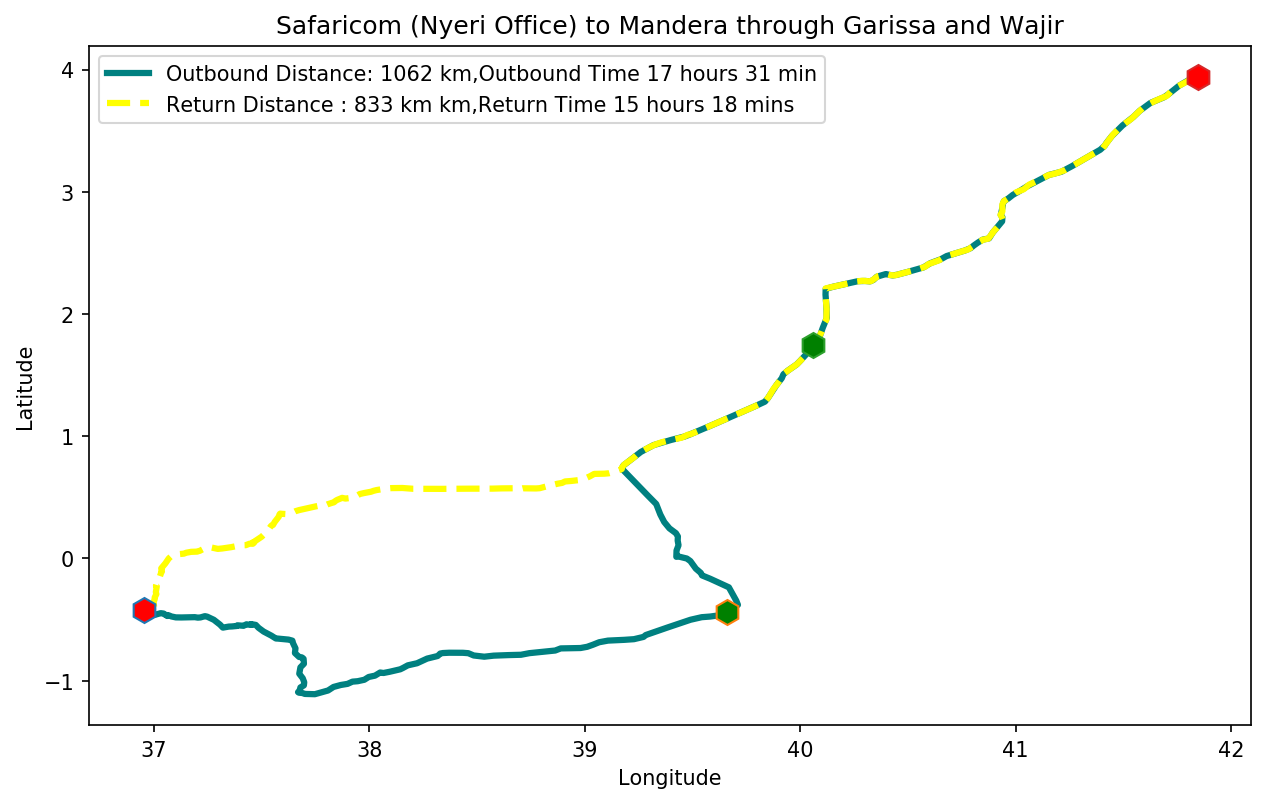

<Figure size 432x288 with 0 Axes>

[21819, 19786, 21474]
[403848, 311178, 347724]
Total Distance 1895


In [3]:
# Load the google maps API
with open ('C:\\Users\\SMNJERU\\api.txt','r') as apiKey:
    
        
        gmaps=googlemaps.Client(apiKey.read())
        outbound = gmaps.directions(origin="-0.422458, 36.953472",waypoints=[(-0.439080404, 39.65948695),(1.743333333, 40.05769444)],destination= "3.940722222 ,41.84772222",mode="driving",departure_time=datetime.now())
        inbound = gmaps.directions(origin="3.940722222 ,41.84772222",destination= "-0.422458, 36.953472",mode="driving",departure_time=datetime.now())
        
              
        #Create a for loop to enter the values of distance and time in a list and increment them through the waypoints(for the first journey)
        dList = [] #Create empty distance list
        tList = [] #Create empty time list
        for x in range(3):
            dList.append(outbound[0]['legs'][x]['distance']['value'])
            tList.append(outbound[0]['legs'][x]['duration']['value'])
        #Convert the time and distance into hours/minutes and km respectively  
        dist = divmod(sum(dList),1000)[0]
        Min = divmod(sum(tList), 60)[0]
        hrs, mins = divmod(Min,60)
        time = "{} hours {} min".format(hrs, mins)                  
        
              
        #Obtain distace and time taken(for the return journey)
        dist2=inbound[0]['legs'][0]['distance']['text']
        time2=inbound[0]['legs'][0]['duration']['text']

        
        #Obtain the Polyline information from the textfile and decode as coordinates
        line=polyline.decode(outbound[0]['overview_polyline']['points'])
        line2=polyline.decode(inbound[0]['overview_polyline']['points'])
                
        xs=[xy[1] for xy in line]
        ys=[xy[0] for xy in line]
        xs1=[xy1[1] for xy1 in line2]
        ys1=[xy1[0] for xy1 in line2]
        
        #Plot the lines for the startpoint, through the waypoints, and back straight through no waypoints
        plt.figure(figsize=(10,6), dpi = 150)
        plt.plot (xs,ys,label="Outbound Distance: {} km,Outbound Time {}".format(dist,time),linewidth=3.0, color = 'teal')
        plt.plot (xs1,ys1,label="Return Distance : {} km,Return Time {}".format(dist2,time2),linewidth=3.0,linestyle='dashed', color = 'yellow')
                
        #Plot the main points in the path (Start, WayPoint1, WayPoint2, End)
        plt.plot( 36.953472,-0.422458 , marker='h',markerfacecolor='red', markersize= 12)
        plt.plot( 39.65948695,-0.439080404 , marker='h' ,markerfacecolor='green', markersize= 12)
        plt.plot( 40.05769444,1.743333333 , marker='h',markerfacecolor='green', markersize= 12)
        plt.plot(41.84772222,3.940722222, marker='h',markerfacecolor='red', markersize= 12)
        
        
        #Add Title and axis labels
        plt.title("Safaricom (Nyeri Office) to Mandera through Garissa and Wajir")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        
        #Add legend
        plt.legend()
        
        #Show Plot
        plt.show ()
        
        #Save figure
        plt.savefig('Nyeri to Mandera.png')
        
print(tList)
print(dList)
print('Total Distance', (1062+833))

In [4]:
#Define time in seconds required fr the 3 legs in outbound trip 
tlist = [21819, 19786, 21474]

In [5]:
#Define function to identify hours and minutes for travel between waypoints on outbound trip
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    return [h, m]

In [6]:
#Find hours and minutes for travel between waypoints on outbound trip

NyrToGrs = tlist[0]
GrsToWaj= tlist[1]
WajT0Mdr = tlist[2]

print(convertSeconds(NyrToGrs))
print(convertSeconds(GrsToWaj))
print(convertSeconds(WajT0Mdr))

[6, 3]
[5, 29]
[5, 57]


In [7]:
#initialize parameters for cost calculation

#Fuel Cost
DieselCostPerL = 108
DriveTestDistance = 5
DistanceTravelled = 1895
TotalDistance = DriveTestDistance + DistanceTravelled
FuelCostPer100km = 16.6 * 108
TotalFuelCost = ceil(TotalDistance/100 * FuelCostPer100km)

#Accomodation Cost
Accomodation = 7000
NumberOfNights = 2
TotalAccomodation = Accomodation * NumberOfNights

#Per Diem Cost
PerDiem = 8000
NumberOfDays = 3
TotalPerDiem = PerDiem * NumberOfDays


#Mileage Cost
MileageAllowancePerKM = 15
TotalMileage = MileageAllowancePerKM * TotalDistance

In [8]:
#Create a dictionary to display the expenses
d = {'Total Fuel Cost': TotalFuelCost, 'Total Accomodation Cost': TotalAccomodation, 'Total Per Diem': TotalPerDiem, 'Total Mileage': TotalMileage,
     'Total Cost': TotalFuelCost + TotalAccomodation + TotalPerDiem +TotalMileage}

#Change the dict into a Data Frame
cost = pd.DataFrame(list(d.items()), columns = ['Expense', 'Amount(KShs)'])
cost

,Expense,Amount(KShs)
0,Total Fuel Cost,34064
1,Total Accomodation Cost,14000
2,Total Per Diem,24000
3,Total Mileage,28500
4,Total Cost,100564


In [10]:
#Create json file for the route
import geojson
with open('NyeriMandera.txt', 'r') as data:

    route = ast.literal_eval(data.read())
      
    #extract overview_polyline and define start and end points for both inbpund and outbound routes
    line=polyline.decode(outbound[0]['overview_polyline']['points'])
    line2=polyline.decode(inbound[0]['overview_polyline']['points'])
    start, end = line[0], line[-1]
    start2, end2 = line2[0], line2[-1]
    
    crs = {"type":"name", "properties":{'name':'EPSG:4326'}}
    
    #define the properties for both routes
    properties = {"name": "Nyeri Saf Shop to Mandera", "LengthKM":1062 ,"timeH":'17 hours 31 mins'}
    properties2 = {"name": "Mandera to Nyeri Saf Shop", "LengthKM":833 ,"timeH":'15 hours 18 mins'}
    #save the outbound route as a json file
    with open('D:\\Digital Academy\\Data Science\\GIS\\route1.geojson', 'w')  as r:
        routejs = geojson.LineString([(xy[1], xy[0]) for xy in line], crs = crs)
               
        #dump routejs to geojson
        geojson.dump(geojson.Feature(geometry = routejs, properties = properties), r)
    #save the inbound route as a json file
    with open('D:\\Digital Academy\\Data Science\\GIS\\route2.geojson', 'w')  as r:
        routejs2 = geojson.LineString([(xy[1], xy[0]) for xy in line2], crs = crs)
        
        #dump routejs to geojson
        geojson.dump(geojson.Feature(geometry = routejs2, properties = properties), r)